<center><img src="img/logo.svg" width="700" class="center" align="center"/></center>


# Divvy Daily Rides

Divvy Bikes is a prominent bike-sharing system operating across multiple cities in the United States. Initially launched in Chicago in 2013, Divvy has expanded its network to include other urban centers like New York City and Washington, D.C. The system provides a convenient and sustainable means of transportation for urban dwellers, offering short-term bike rentals for various purposes.

**HOW DIVVY OPERATES**

Divvy operates through a network of strategically placed docking stations scattered throughout the city. Users can quickly locate and unlock bicycles at these stations using a smartphone app, a membership key, or a credit card. Once their ride is complete, users can return the bike to any available docking station within the network.

**ADVANTAGES OF DIVVY BIKES**

- **Sustainability**: Divvy promotes eco-friendly transportation alternatives by reducing reliance on cars and public transit.
- **Convenience**: The system provides a hassle-free mode of transportation for short-distance travel, such as commuting to work, running errands, or exploring the city.
- **Health Benefits**: Riding a Divvy bike offers physical activity and exercise opportunities, contributing to improved fitness and well-being.
- **Traffic Reduction**: By encouraging cycling, Divvy helps alleviate traffic congestion and minimizes the demand for parking spaces in urban areas.

**BACKGROUND**

Given the benefits of sustainability, convenience, and health associated with bicycle travel, it is crucial to understand how exogenous factors such as temperature and climate influence the frequency of bicycle trips. Understanding these influences is crucial in predicting the demand for bike-sharing services over time.

**MAIN OBJECTIVE**:

Predict the demand for bicycle trips over time, considering the impact of temperature and climate as significant external factors.

**SPECIFIC OBJECTIVES**
- **Benchmarking and Model Comparison**: Compare traditional statistical forecasting methods (such as moving averages, Holt-Winters, and SARIMAX) with modern machine learning approaches (including CNN, RNN, and LSTM). This comparison will help establish a benchmark for assessing the effectiveness of various models in predicting bicycle trip demand.
- **Model Selection**: Choose the optimal forecasting model based on key performance metrics such as RMSE (Root Mean Square Error) and MAPE (Mean Absolute Percentage Error). This selection will focus on accuracy and reliability in forecasting demand under varying climatic conditions.
- **Model Interpretability**: Explore the interpretative capabilities of each model to understand how they incorporate and reflect the impact of exogenous factors like seasonality, climate, and temperature. This analysis will aid in refining the models to suit predictive needs better.
- **Impact Analysis**: Investigate how variations in seasonality, climate, and temperature specifically affect the demand for bicycle trips. This understanding will help plan and optimize bike-sharing operations to align with environmental conditions and user preferences.

**RESEARCH METHODOLOGY**

The following research presents a quantitative approach, aimed at forecasting bicycle rides by comparing different models using a performance metric (MAPE).

By establishing a comparison criterion, an approach for hypothesis formation and evaluation is presented, based on the premise that modern Machine Learning (ML) prediction methods can present better performance compared to some classical models.

**EXPLORATORY DATA ANALYSIS (EDA)**

The primary objective of this project is to conduct an Exploratory Data Analysis (EDA) for the provided Divvy Bikes dataset. The EDA process involves thorough examination, visualization, and interpretation of the dataset to gain insights into the variables' underlying patterns, relationships, and distributions.

**Key Goals of the EDA**

- **Understand Data Structure**: Gain a comprehensive understanding of the dataset's structure, including the number of observations, variables, and their respective data types.
- **Identify Data Quality Issues**: Detect and address any missing values, outliers, or inconsistencies within the dataset that may impact the analysis or modeling process.
- **Explore Descriptive Statistics**: Calculate summary statistics and visualize the distributions of key variables, such as the number of rides, temperature, and weather conditions, to uncover central tendencies, variability, and potential trends.
- **Examine Temporal Trends**: Investigate temporal patterns and trends in bike ridership over the study period to identify seasonality, cyclical variations, and long-term trends.
- **Assess Correlations and Relationships**: Explore correlations and relationships between variables, such as the relationship between ride counts and temperature/weather conditions, to uncover potential dependencies and causal factors.

**DATASET INFORMATION**

The dataset comprises records spanning from 2014 to 2017, encompassing a total of 1458 observations. Each observation corresponds to a single day and includes the following features:

- **Date**: The date feature represents the calendar date of the observations. The dataset provides a daily resolution, capturing data for each day within the specified time frame.
- **Rides**: This feature records the number of bicycle rides taken per day within the Divvy system. It serves as a key metric for assessing bike ridership trends and patterns over time.
- **Temperature**: The temperature feature denotes the average temperature in Fahrenheit recorded for each day. This information provides insights into how temperature fluctuations might impact bike usage patterns.
- **Weather**: The weather feature is a categorical variable that describes the prevailing weather conditions for each day. It includes descriptors such as "sunny," "rainy," "cloudy," etc., offering contextual information regarding weather conditions during the observed period.

The dataset provides a rich source of information for predictive modeling, with one of the key variables of interest being the number of bike **rides** taken per day. This variable serves as a target for prediction in analytical and modeling tasks to understand and forecast bike ridership trends within the Divvy system.

## Imports

In [1]:
#from google.colab import drive
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

#drive.mount('/content/drive')

2024-05-29 21:48:01.380355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 21:48:02.271182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Constants



In [2]:
# Paths
DATA_PATH = "dataset/divvy_daily.csv"

# Columns
DATE = "date"
RIDES = "rides"
TEMPERATURE = "temperature"
WEATHER = "weather"

# HYPERPARAMETERS
TIME_STEP = 10
RNN_FAMILY_FIRST_LAYER = 50
RNN_FAMILY_SECOND_LAYER = 50
DENSE_FIRST_LAYER = 25
DENSE_SECOND_LAYER = 1
OPTIMIZER = 'adam'
LOSS = 'mean_squared_error'
DROP_PERCENT = 0.2
EPOCHS = 500
BATCH_SIZE = 32

## Functions



In [3]:
def univariate_distribution_plot(dataset, feature):
    """
    Plots the distribution of a specified feature in the dataset, including quartiles as vertical lines.
    
    Args:
    dataset (DataFrame): The dataset containing the feature.
    feature (str): The feature to plot.
    """
    plt.hist(dataset[feature], bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Calculate and plot quartiles
    quartiles = np.percentile(dataset[feature], [25, 50, 75])
    for quartile in quartiles:
        plt.axvline(quartile, color='r', linestyle='--', label=f'Q{list(quartiles).index(quartile)+1} ({quartile:.2f})')

    plt.legend()
    plt.show()

def categorical_distribution_plot(dataset, feature):
    """
    Plots the distribution of a specified categorical feature in the dataset.
    """
    plt.hist(dataset[feature], color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

def plot_feature_with_percentiles(dataset, feature):
    """
    Plots a quantitative feature over time and marks its main percentiles including the 90th and 99th percentiles.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    feature (str): The feature to plot.
    """
    # Set the date as the index and sort it
    dataset = dataset.set_index(DATE).sort_index()
    
    # Plotting the feature over time
    plt.figure(figsize=(12, 6))
    dataset[feature].plot(label=f'{feature} over Time')
    
    # Calculate and plot percentiles
    percentiles = np.percentile(dataset[feature], [25, 50, 75, 90, 99])
    percentile_labels = ['25th', '50th', '75th', '90th', '99th']
    colors = ['green', 'blue', 'purple', 'orange', 'red']
    
    for percentile, label, color in zip(percentiles, percentile_labels, colors):
        plt.axhline(y=percentile, color=color, linestyle='--', label=f'{label} Percentile ({percentile:.2f})')
    
    plt.title(f'Time Series Plot of {feature} with Percentiles')
    plt.xlabel('Date')
    plt.ylabel(feature.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_feature_over_time(dataset, feature, aggregation='daily', moving_avg1=None, moving_avg2=None):
    """
    Plots the specified feature over time with optional moving averages.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    feature (str): The feature to plot.
    aggregation (str): The aggregation level ('daily', 'weekly', 'monthly').
    moving_avg1 (int): The window size for the first moving average.
    moving_avg2 (int): The window size for the second moving average.
    """
    # Resample the dataset based on the aggregation level
    if aggregation == 'daily':
        resampled_data = dataset.set_index(DATE)[feature]
    elif aggregation == 'weekly':
        resampled_data = dataset.set_index(DATE)[feature].resample('W').mean()
    elif aggregation == 'monthly':
        resampled_data = dataset.set_index(DATE)[feature].resample('M').mean()
    else:
        raise ValueError("Invalid aggregation type. Choose 'daily', 'weekly', or 'monthly'.")

    # Plotting the resampled data
    plt.figure(figsize=(12, 6))
    resampled_data.plot(label=f'{feature} ({aggregation})')

    # Plot moving averages if specified
    if moving_avg1:
        resampled_data.rolling(window=moving_avg1).mean().plot(label=f'Moving Average - {moving_avg1}')
    if moving_avg2:
        resampled_data.rolling(window=moving_avg2).mean().plot(label=f'Moving Average - {moving_avg2}')

    # Adding plot title and labels
    plt.title(f'{feature.capitalize()} Over Time ({aggregation.capitalize()}) with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel(feature.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_categorical_distribution(dataset, categorical_var, quantitative_var):
    """
    Plots the distribution of a quantitative variable split by a categorical variable.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    categorical_var (str): The categorical variable to split the data by.
    quantitative_var (str): The quantitative variable to analyze.
    """
    # Set up the figure
    plt.figure(figsize=(12, 6))
    
    # Get unique categories
    categories = dataset[categorical_var].unique()
    
    # Plot distribution for each category
    for category in categories:
        subset = dataset[dataset[categorical_var] == category]
        sns.distplot(subset[quantitative_var], hist=False, label=str(category))
    
    plt.title(f'Distribution of {quantitative_var} by {categorical_var}')
    plt.xlabel(quantitative_var.capitalize())
    plt.ylabel('Density')
    plt.legend(title=categorical_var.capitalize())
    plt.grid(True)
    plt.show()

def plot_monthly_boxplots(dataset, feature):
    """
    Plots monthly box plots of a quantitative feature over time to analyze the distribution and identify outliers.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    feature (str): The quantitative feature to analyze.
    """
    # Set the date as the index
    dataset = dataset.set_index(DATE)
    
    # Extract month and year from the date for grouping
    dataset['YearMonth'] = dataset.index.to_period('M')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='YearMonth', y=feature, data=dataset)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.title(f'Monthly Box Plots of {feature}')
    plt.xlabel('Month')
    plt.ylabel(feature.capitalize())
    plt.grid(True)
    plt.show()

def plot_correlation_quantitative(dataset, feature1, feature2):
    """
    Calculates and plots the Pearson correlation coefficient between two quantitative features.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    feature1 (str): The first quantitative feature.
    feature2 (str): The second quantitative feature.
    """
    correlation = dataset[feature1].corr(dataset[feature2], method='spearman')
    plt.figure(figsize=(6, 4))
    sns.heatmap([[correlation]], annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
    plt.xticks([0.5], [f'{feature1} vs {feature2}'])
    plt.yticks([0.5], ['Correlation'], rotation=0)
    plt.title('Spearman Correlation Coefficient')
    plt.show()
    return correlation

def plot_correlation_quantitative_categorical(dataset, quantitative_var, categorical_var):
    """
    Calculates and plots the correlation (eta squared) between a quantitative variable and a categorical variable.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    quantitative_var (str): The quantitative variable.
    categorical_var (str): The categorical variable.
    """
    overall_mean = dataset[quantitative_var].mean()
    categories = dataset[categorical_var].unique()
    ss_between = sum(dataset[dataset[categorical_var] == category][quantitative_var].count() * 
                     (dataset[dataset[categorical_var] == category][quantitative_var].mean() - overall_mean) ** 2 
                     for category in categories)
    ss_total = sum((value - overall_mean) ** 2 for value in dataset[quantitative_var])
    eta_squared = ss_between / ss_total
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[categorical_var], y=[eta_squared])
    plt.title('Eta Squared Correlation')
    plt.ylabel('Eta Squared')
    plt.ylim(0, 1)
    plt.show()
    
    return eta_squared

def plot_moving_correlation(dataset, feature1, feature2, window_size=30):
    """
    Calculates and plots the moving correlation coefficient between two quantitative features over time.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    feature1 (str): The first quantitative feature.
    feature2 (str): The second quantitative feature.
    window_size (int): The window size for calculating the moving correlation.
    """
    # Set the date as the index
    dataset = dataset.set_index(DATE)
    
    # Calculate rolling correlation
    rolling_correlation = dataset[feature1].rolling(window=window_size).corr(dataset[feature2])
    
    # Plotting
    plt.figure(figsize=(12, 6))
    rolling_correlation.plot()
    plt.title(f'Moving Correlation between {feature1} and {feature2} (Window: {window_size} days)')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    # Improve x-axis ticks to show months more clearly
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set major ticks interval every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format to show year and month
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

def plot_monthly_distribution_categorical(dataset, categorical_var):
    """
    Plots the monthly distribution of a categorical variable over time, normalized to show percentages.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    categorical_var (str): The categorical variable to analyze.
    """
    # Set the date as the index
    dataset = dataset.set_index(DATE)
    
    # Extract month and year from the date for grouping
    dataset['YearMonth'] = dataset.index.to_period('M')
    
    # Count occurrences of each category per month and normalize
    monthly_counts = dataset.groupby('YearMonth')[categorical_var].value_counts().unstack().fillna(0)
    monthly_normalized = monthly_counts.div(monthly_counts.sum(axis=1), axis=0)  # Normalize by row sum
    
    # Plotting
    plt.figure(figsize=(18, 9))
    monthly_normalized.plot(kind='bar', stacked=True, width=0.8, figsize=(18, 9))  # Increased bar width
    plt.title(f'Monthly Distribution of {categorical_var} (Normalized)')
    plt.xlabel('Month')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.legend(title=categorical_var)
    plt.grid(True)
    plt.show()

def plot_categorical_quantitative_distribution_over_time(dataset, categorical_var, quantitative_var, date_column):
    """
    Plots the distribution of a quantitative variable split by a categorical variable over time, aggregated monthly.
    
    Args:
    dataset (DataFrame): The dataset containing the features.
    categorical_var (str): The categorical variable to split the data by.
    quantitative_var (str): The quantitative variable to analyze.
    date_column (str): The name of the column containing date data.
    """
    # Check if the necessary columns exist
    if date_column not in dataset.columns or categorical_var not in dataset.columns or quantitative_var not in dataset.columns:
        raise ValueError("One or more columns specified do not exist in the dataset")

    # Ensure the date column is datetime type for proper period conversion
    if not pd.api.types.is_datetime64_any_dtype(dataset[date_column]):
        dataset[date_column] = pd.to_datetime(dataset[date_column])

    # Set the date as the index
    dataset = dataset.set_index(date_column)
    
    # Extract month and year from the date for grouping
    dataset['YearMonth'] = dataset.index.to_period('M')
    
    # Grouping data
    grouped_data = dataset.groupby(['YearMonth', categorical_var])[quantitative_var].mean().unstack()

    # Convert Period index to datetime (or string for simplicity in plotting)
    grouped_data.index = grouped_data.index.to_timestamp()

    # Plotting
    plt.figure(figsize=(18, 9))
    for category in grouped_data.columns:
        plt.plot(grouped_data.index.strftime('%Y-%m'), grouped_data[category], label=str(category))
    
    plt.title(f'Monthly Distribution of {quantitative_var} by {categorical_var}')
    plt.xlabel('Month')
    plt.ylabel(quantitative_var.capitalize())
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title=categorical_var)
    plt.grid(True)
    plt.show()

def df_drop_columns(df):
    """
    Set the date column as the index and drop the temperature and weather columns.
    Args:
    df (DataFrame): The input DataFrame.
    """
    df = df.set_index(DATE)
    df = df.drop(columns = [TEMPERATURE, WEATHER])

    return df

def splitter_and_scaler(df):
    """
    Split the DataFrame into training and testing sets and scale the data.
    Args:
    df (DataFrame): The input DataFrame.
    """
    train_size = int(len(df) * 0.8)
    test_size = len(df) - train_size
    train_data, test_data = df.iloc[0:train_size], df.iloc[train_size:len(df)]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled, scaler

def create_dataset(data, time_step=1):
    """
    Create a dataset for time series prediction.
    Args:
    data (array): The input data.
    time_step (int): The number of time steps to use for each sample.
    """
    X, y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

def simple_LSTM():
    """
    Build and compile a simple LSTM model.
    Returns:
    Sequential: The compiled LSTM model.
    """
    model = Sequential()
    model.add(LSTM(RNN_FAMILY_FIRST_LAYER, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model.add(LSTM(RNN_FAMILY_SECOND_LAYER, return_sequences=False))
    model.add(Dense(DENSE_SECOND_LAYER))
    model.compile(optimizer=OPTIMIZER, loss=LOSS)

    return model

def simple_GRU():
    """
    Build and compile a simple GRU model.
    Returns:
    Sequential: The compiled GRU model.
    """
    model = Sequential()
    model.add(GRU(RNN_FAMILY_FIRST_LAYER, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model.add(GRU(RNN_FAMILY_SECOND_LAYER, return_sequences=False))
    model.add(Dense(DENSE_SECOND_LAYER))
    model.compile(optimizer=OPTIMIZER, loss=LOSS)

    return model

def simple_RNN():
    """
    Build and compile a simple RNN model.
    Returns:
    Sequential: The compiled RNN model.
    """
    model = Sequential()
    model.add(SimpleRNN(RNN_FAMILY_FIRST_LAYER, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model.add(SimpleRNN(RNN_FAMILY_SECOND_LAYER, return_sequences=False))
    model.add(Dense(DENSE_SECOND_LAYER))
    model.compile(optimizer=OPTIMIZER, loss=LOSS)

    return model

def LSTM_with_drop():
    """
    Build and compile an LSTM model with dropout layers.
    Returns:
    Sequential: The compiled LSTM model with dropout.
    """
    model = Sequential()
    model.add(LSTM(RNN_FAMILY_FIRST_LAYER, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model.add(Dropout(DROP_PERCENT))
    model.add(LSTM(RNN_FAMILY_SECOND_LAYER, return_sequences=False))
    model.add(Dropout(DROP_PERCENT))
    model.add(Dense(DENSE_FIRST_LAYER))
    model.add(Dropout(DROP_PERCENT))
    model.add(Dense(DENSE_SECOND_LAYER))
    model.compile(optimizer=OPTIMIZER, loss=LOSS)

    return model

def inverse_transform_and_mape(train_predict, test_predict,y_train, y_test, scaler):
    """
    Inverse transform the predictions and calculate the MAPE.
    Args:
    train_predict (array): Training predictions.
    test_predict (array): Testing predictions.
    y_train (array): True training values.
    y_test (array): True testing values.
    scaler (MinMaxScaler): Scaler used for inverse transformation.
    """
    train_predict = scaler.inverse_transform(train_predict)
    y_train_true = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predict = scaler.inverse_transform(test_predict)
    y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    mape = mean_absolute_percentage_error(y_test_true, test_predict)
    print(f'MAPE: {mape:.4f}')
    
    return train_predict, test_predict

def train_test_real_plot(df, time_step, train_predict, test_predict, scaler, train_scaled, test_scaled):
    """
    Plot the real and predicted values for training and testing sets.
    Args:
    df (DataFrame): The input DataFrame.
    time_step (int): Number of time steps used for each sample.
    train_predict (array): Training predictions.
    test_predict (array): Testing predictions.
    scaler (MinMaxScaler): Scaler used for inverse transformation.
    train_scaled (array): Scaled training data.
    test_scaled (array): Scaled testing data.
    """
    plt.figure(figsize=(14, 5))

    train_predict_plot = np.empty_like(np.concatenate((train_scaled, test_scaled), axis=0))
    train_predict_plot[:, :] = np.nan
    train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

    test_predict_plot = np.empty_like(np.concatenate((train_scaled, test_scaled), axis=0))
    test_predict_plot[:, :] = np.nan
    test_predict_plot[len(train_predict) + (time_step * 2):len(df), :] = test_predict

    plt.plot(df.index, scaler.inverse_transform(np.concatenate((train_scaled, test_scaled), axis=0)), label='Real')
    plt.plot(df.index, train_predict_plot, label='Train Predict')
    plt.plot(df.index, test_predict_plot, label='Test Predict')
    plt.legend()
    plt.show()

def loss_per_epoch_plot(history):
    """
    Plot the loss per epoch from the training history.
    Args:
    history (History): The training history object.
    """
    loss_per_epoch = history.history['loss']

    plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Pérdida por epoch')
    plt.show()

## Load Data

In [4]:
dataset = pd.read_csv(DATA_PATH)
dataset[DATE] = pd.to_datetime(dataset[DATE])

dataset.head()

,date,rides,temperature,weather
0,2014-01-01,95,19.483158,rain or snow
1,2014-01-02,111,16.833333,rain or snow
2,2014-01-03,6,-5.633333,clear
3,2014-01-04,181,30.007735,rain or snow
4,2014-01-05,32,16.756250,rain or snow


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1458 non-null   datetime64[ns]
 1   rides        1458 non-null   int64         
 2   temperature  1458 non-null   float64       
 3   weather      1458 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 45.7+ KB


## Dataset Preprocessing

### Temperature

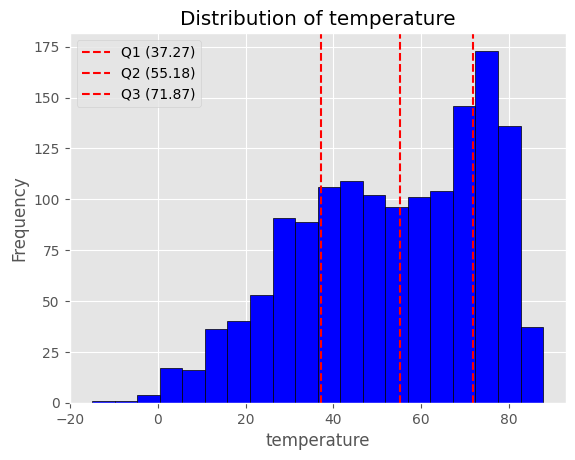

In [6]:
univariate_distribution_plot(dataset, TEMPERATURE)

The histogram shows a relatively symmetrical distribution of temperatures around the median, suggesting a typical temperature pattern expected with seasonal variation. The peak frequency occurs in the 50-60°F range, which could be an ideal temperature range for biking in many urban settings. The quartiles (Q1, Q2, Q3) are marked at 37.27°F, 55.18°F, and 71.87°F, respectively, indicating that half of the days are between 55.18°F and 71.87°F, a temperature range likely considered comfortable for outdoor activities like biking.

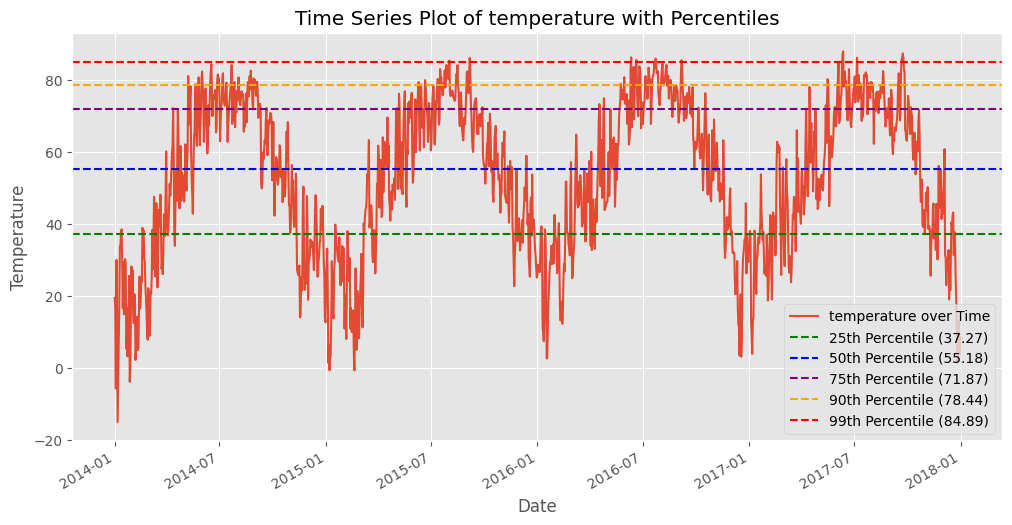

In [7]:
plot_feature_with_percentiles(dataset, TEMPERATURE)

This plot overlays the daily temperature data with percentile lines, indicating how the temperature fluctuates throughout the year. The seasonal pattern is evident, with temperature peaks during summer and troughs during winter. The percentile lines help quickly identify the temperature ranges for most days of the year. They can help assess anomalies or extreme temperature days.

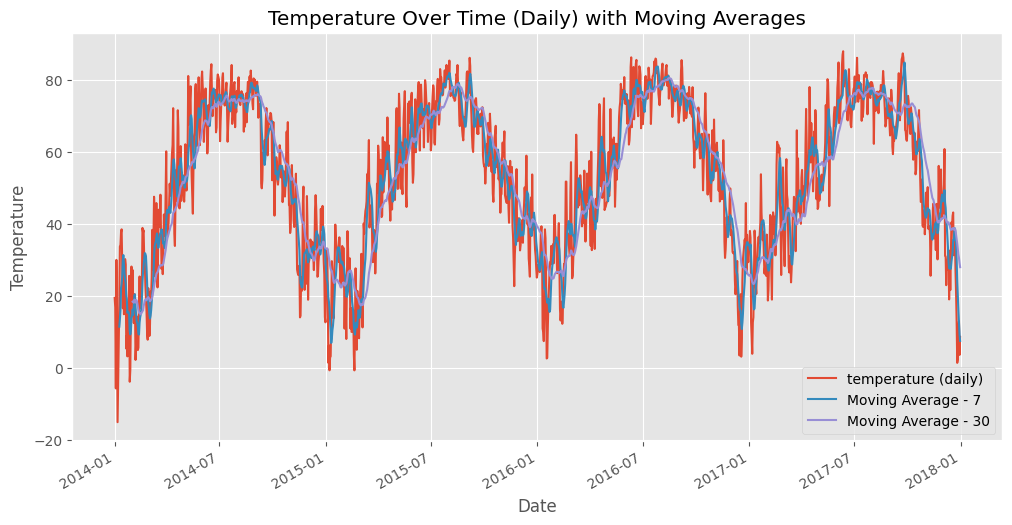

In [8]:
plot_feature_over_time(dataset, TEMPERATURE, 'daily', 7, 30)

Adding moving averages (7-day and 30-day) smoothens the daily temperature plot, making it easier to observe longer-term trends and cycles. This plot is essential for identifying periods of stable temperatures and sudden changes. It also highlights the cyclical nature of temperature over the years, which is crucial for analyzing its impact on bike usage patterns.

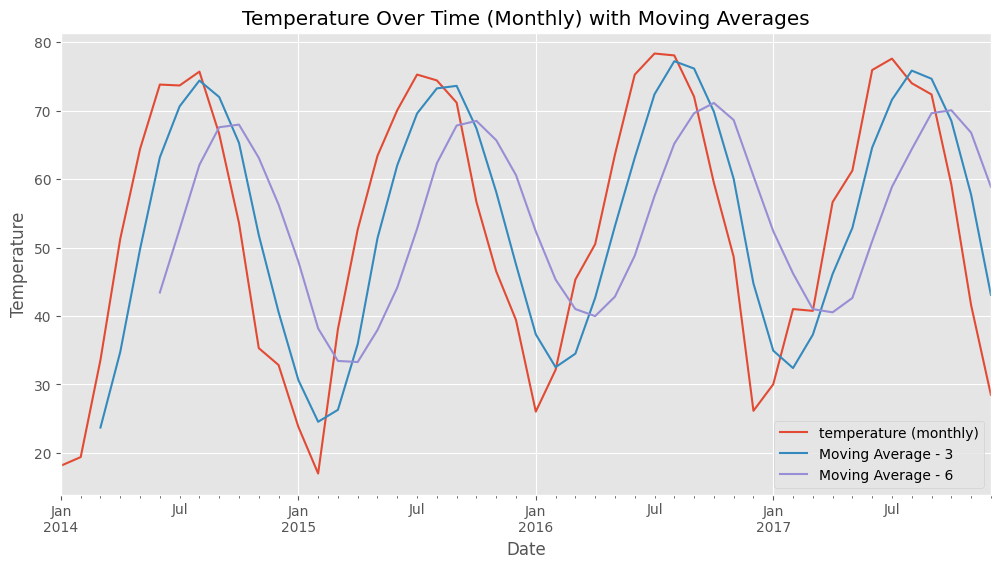

In [9]:
plot_feature_over_time(dataset, TEMPERATURE, 'monthly', 3, 6)

This plot further aggregates the temperature data into monthly averages and overlays shorter (3-month) and longer (6-month) moving averages. It provides a clearer view of the seasonal temperature trends and annual repetition. Such a visualization helps understand how temperature behaves over different years in a comparable format, vital for forecasting or comparing year-on-year trends.

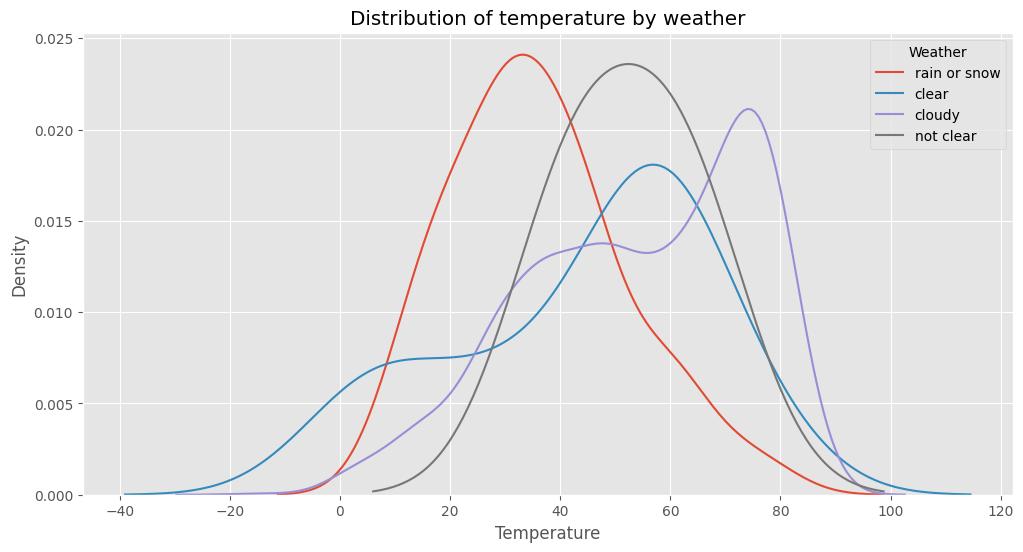

In [10]:
plot_categorical_distribution(dataset, WEATHER, TEMPERATURE)

This density plot categorizes temperature distributions within different weather conditions (rain or snow, clear, cloudy, not clear). It shows distinct temperature profiles for each weather category, which can be crucial for understanding how weather conditions might influence biking habits. For instance, temperatures during clear days tend to have a broader and more favorable range than rain or snow days.

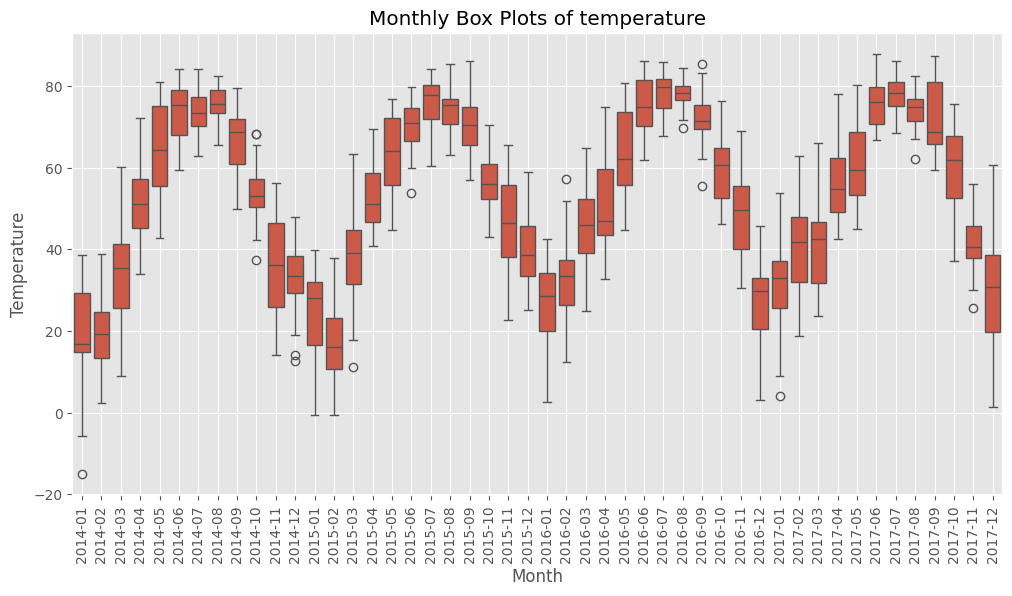

In [11]:
plot_monthly_boxplots(dataset, TEMPERATURE)

These box plots offer a month-by-month breakdown of temperature variability. Each box plot provides the median temperature, the interquartile range, and potential outliers within each month over the years. This visualization is beneficial for understanding the variability within each month and preparing for extreme conditions that might affect bike usage. Given the annual seasonality, it is possible to see the monthly temperature distribution over time and its behavior.

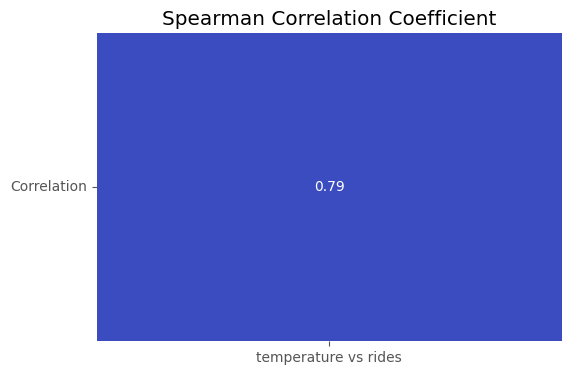

0.7924595485398372

In [12]:
plot_correlation_quantitative(dataset, TEMPERATURE, RIDES)

The coefficient of 0.79 between temperature and rides suggests a strong positive correlation, implying that the number of bike rides also tends to increase as temperatures increase. This type of correlation is crucial for predictive modeling, as it indicates that temperature is a significant predictor of bike ride frequency.

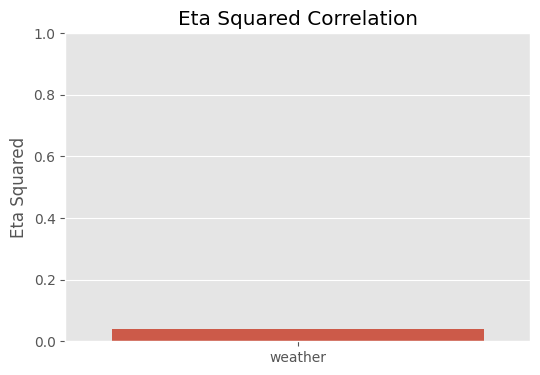

0.039811514623701326

In [13]:
plot_correlation_quantitative_categorical(dataset, TEMPERATURE, WEATHER)

The eta squared value between weather and temperature is quite low, indicating that the variation in weather conditions explains a relatively small portion of the variance in temperature. This suggests that while weather categories (like sunny, rainy, cloudy) are intuitively linked to temperature changes, they may not provide a comprehensive explanation of temperature variations.

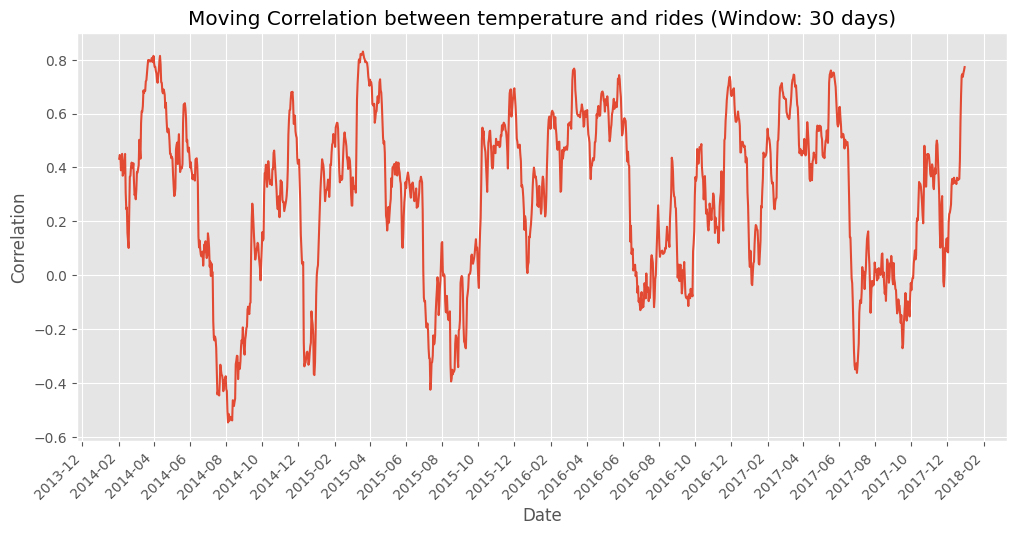

In [14]:
plot_moving_correlation(dataset, TEMPERATURE, RIDES, 30)

The moving correlation plot provides a dynamic view of how the relationship between temperature and rides changes over time. Notably, the correlation remains positive but varies significantly throughout the year. This plot is particularly insightful for identifying specific periods when the correlation strength changes, which changes may influence weather patterns or urban activities.

### Weather

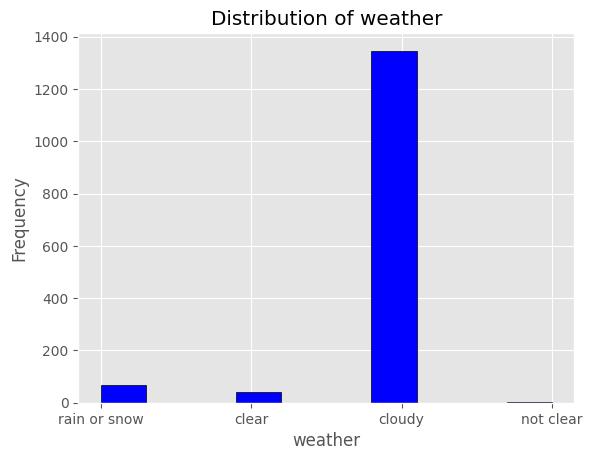

In [15]:
categorical_distribution_plot(dataset, WEATHER)

This bar chart shows the frequency of different weather conditions. The most common condition is "cloudy," followed by "rain or snow," with "clear" and "not clear" occurring less frequently. This distribution indicates that the dataset predominantly includes days with less severe weather, which might influence the general patterns of bike usage observed.

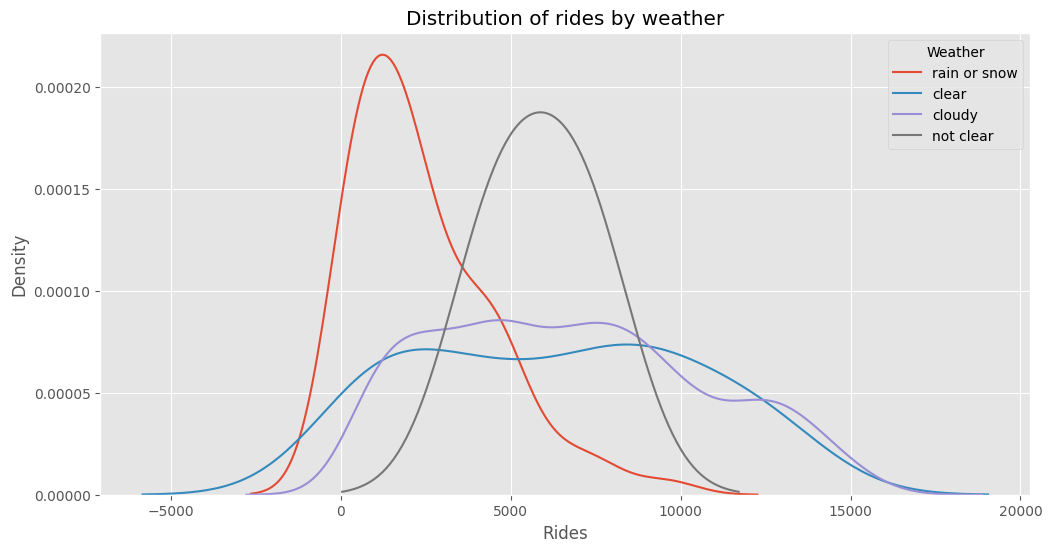

In [16]:
plot_categorical_distribution(dataset, WEATHER, RIDES)

The kernel density estimation (KDE) plots for the number of rides across different weather conditions show distinct patterns:
- **Rain or Snow:** Lower density and distribution, suggesting fewer rides occur during these conditions, likely due to discomfort or safety concerns.
- **Clear and Cloudy:** Exhibits a lower and broader distribution than Not Clear days, indicating variability but generally reduced bike usage compared to Not Clear days.
- **Not Clear:** Higher peaks and broader spreads indicate a higher ride frequency. Not Clear days have the highest peak.


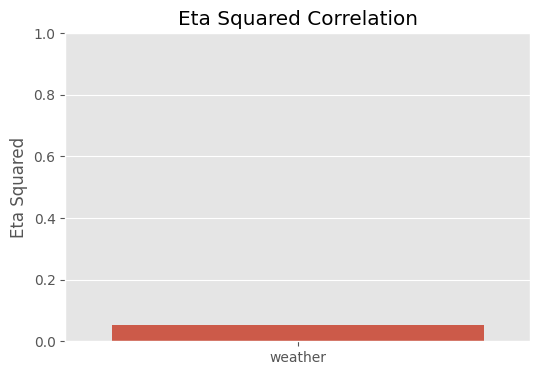

0.05386917193483622

In [17]:
plot_correlation_quantitative_categorical(dataset, RIDES, WEATHER)

The eta squared value is low, indicating that while weather conditions impact the number of rides, they only explain a small proportion of the variance in ride numbers. This suggests that other factors (like the day of the week, holidays, and temperature) may significantly influence ride patterns.

<Figure size 1800x900 with 0 Axes>

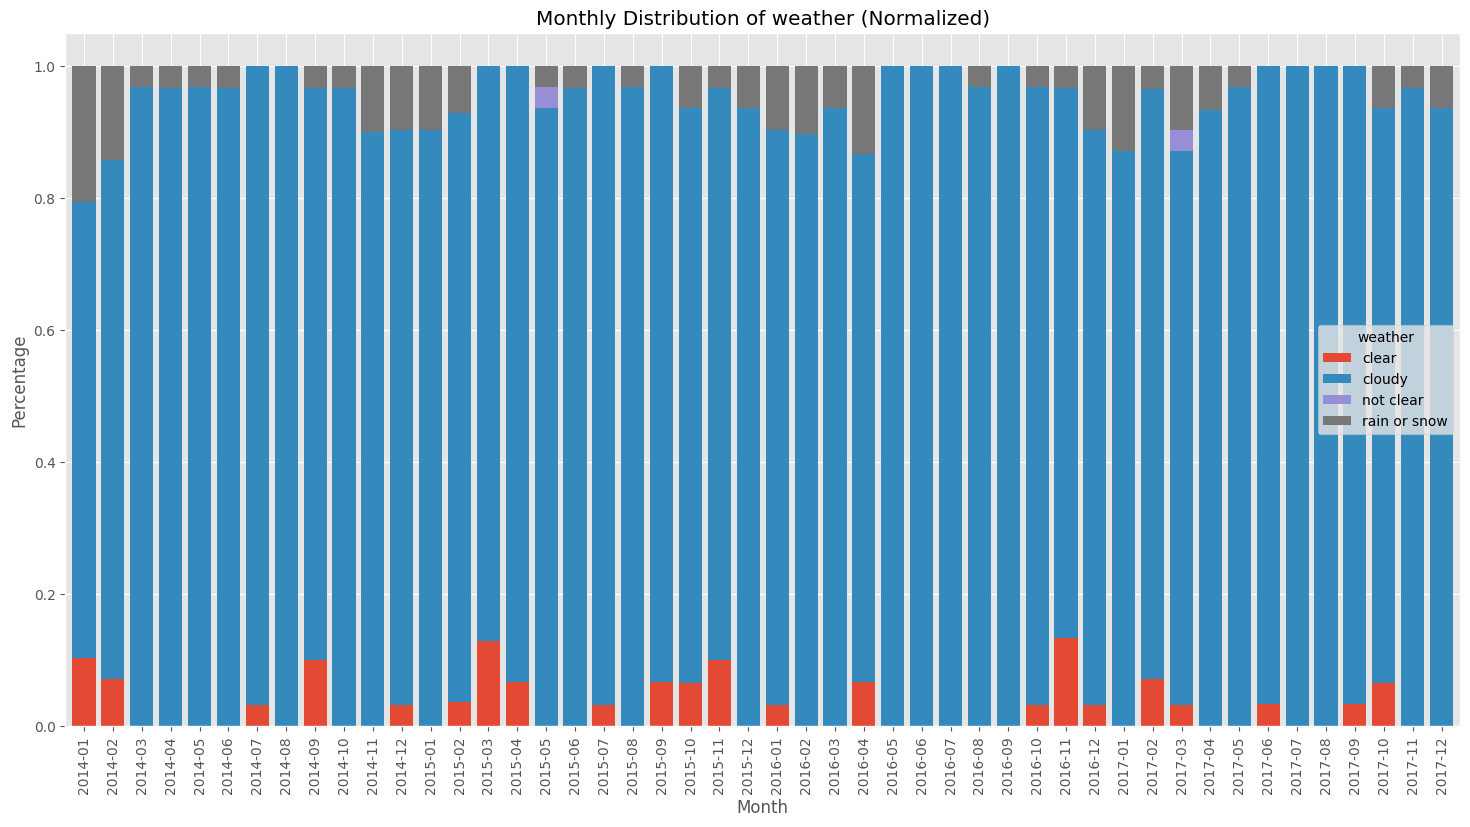

In [18]:
plot_monthly_distribution_categorical(dataset, WEATHER)

This stacked bar chart provides insight into the proportion of different weather conditions each month, normalized over the dataset period. It shows a consistent dominance of cloudy days throughout the year, with spikes in rain or snow primarily during expected seasonal changes. This visualization helps understand how predictable weather changes are over the year and how they correlate with ride usage.

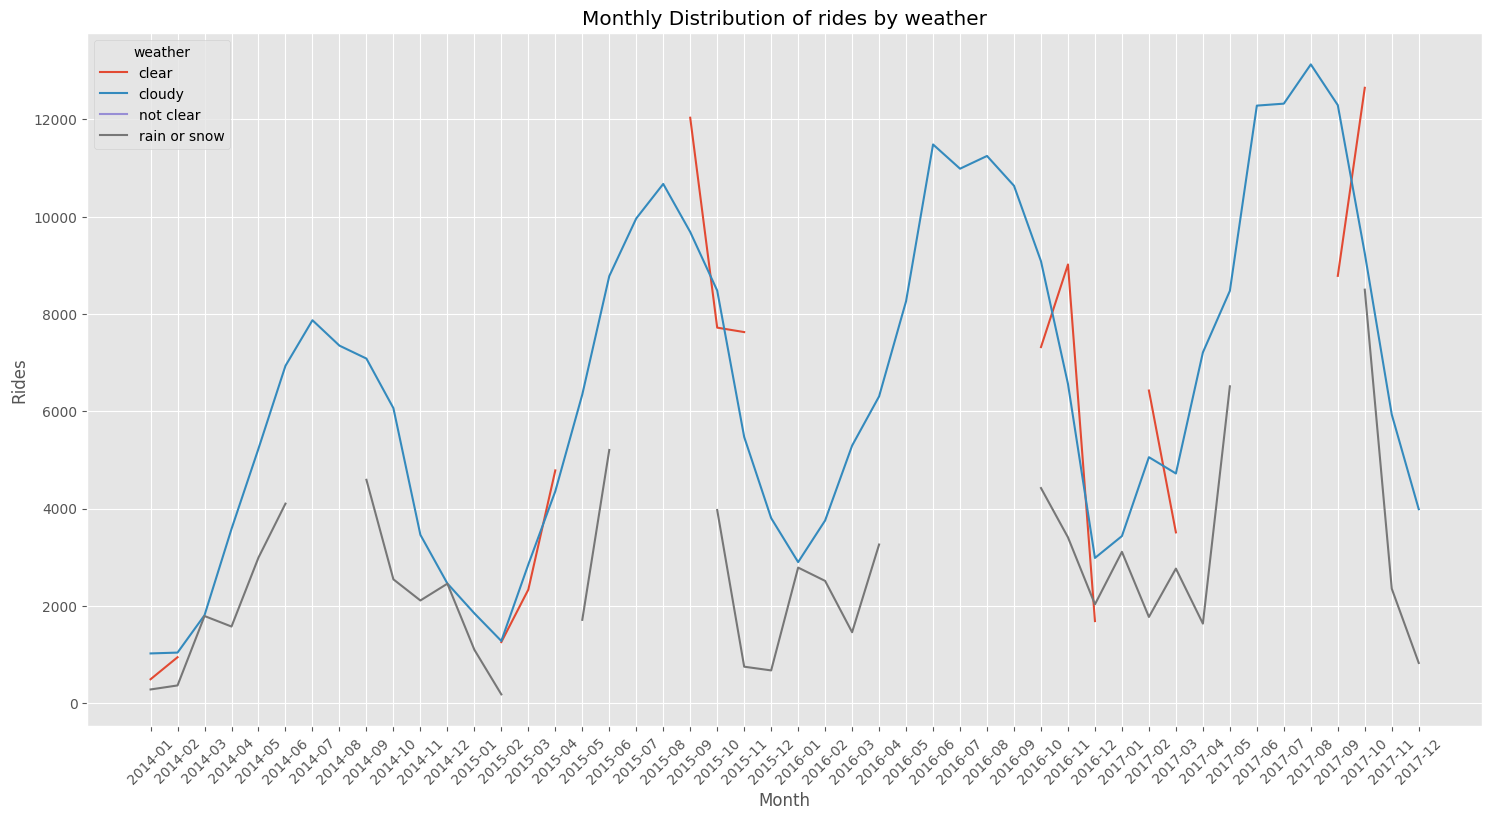

In [19]:
plot_categorical_quantitative_distribution_over_time(dataset, WEATHER, RIDES, DATE)

This line graph illustrates the number of rides per month, segmented by weather conditions:
- **Clear Weather:** Shows peaks coinciding with milder months, suggesting that clear weather significantly boosts biking.
- **Cloudy:** Follows a similar trend to clear weather but with generally lower counts, indicating a preference for clear days.
- **Rain or Snow:** Noticeably fewer rides during these conditions, highlighting the strong negative impact of adverse weather on biking habits.
- **Not Clear:** Shows reduced biking activity compared to clear days, consistent with the general preference for clear, predictable weather when biking.



### Rides

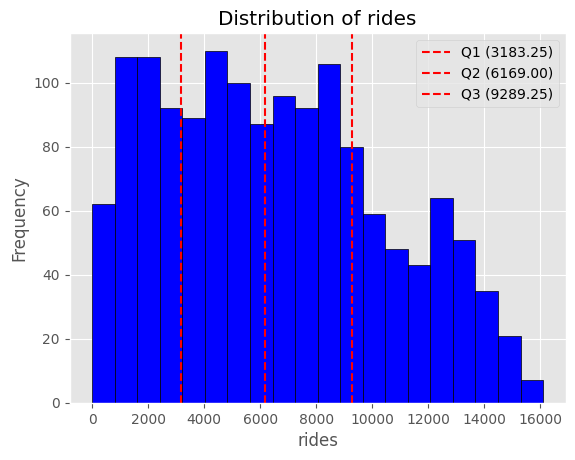

In [20]:
univariate_distribution_plot(dataset, RIDES)

This histogram provides a broad view of the distribution of daily rides. The data appear right-skewed, indicating more days with fewer rides and fewer days with a very high number of rides. Key statistics like the quartiles are highlighted:
- **Q1 (3183.25):** 25% of the days have rides less than or equal to this value.
- **Q2 (6169.00):** This median value suggests that half of the days have rides below this number.
- **Q3 (9289.25):** 75% of the days have rides less than or equal to this number.

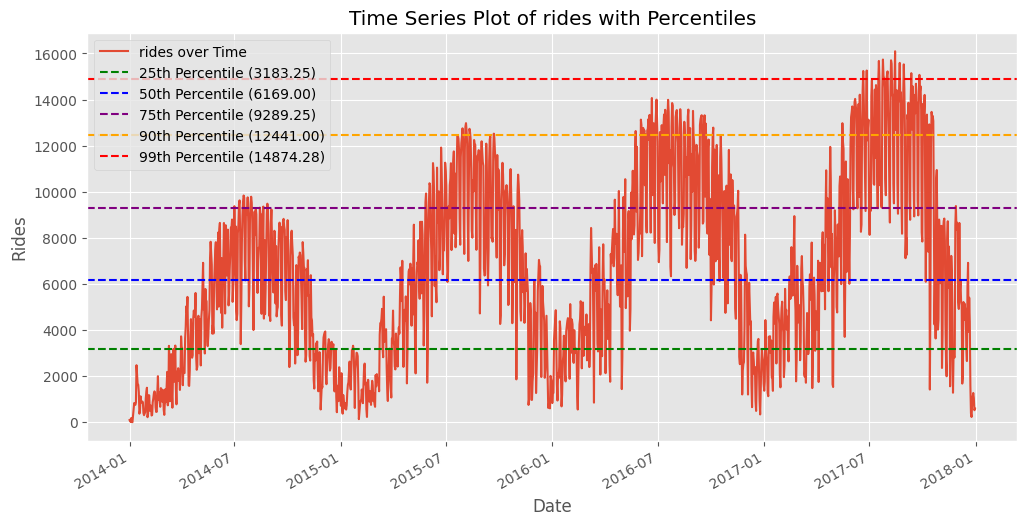

In [21]:
plot_feature_with_percentiles(dataset, RIDES)

This plot provides a temporal view of how rides vary over time along with key percentile lines. Notably:
- **Seasonal Trends:** There is a clear seasonal pattern with peaks typically in the warmer months and troughs during colder months, reflecting higher usage during favorable weather conditions.
- **Outliers:** Days that significantly exceed the 90th percentile or fall below the 25th percentile could be influenced by specific local events or extreme weather conditions, warranting a closer look.

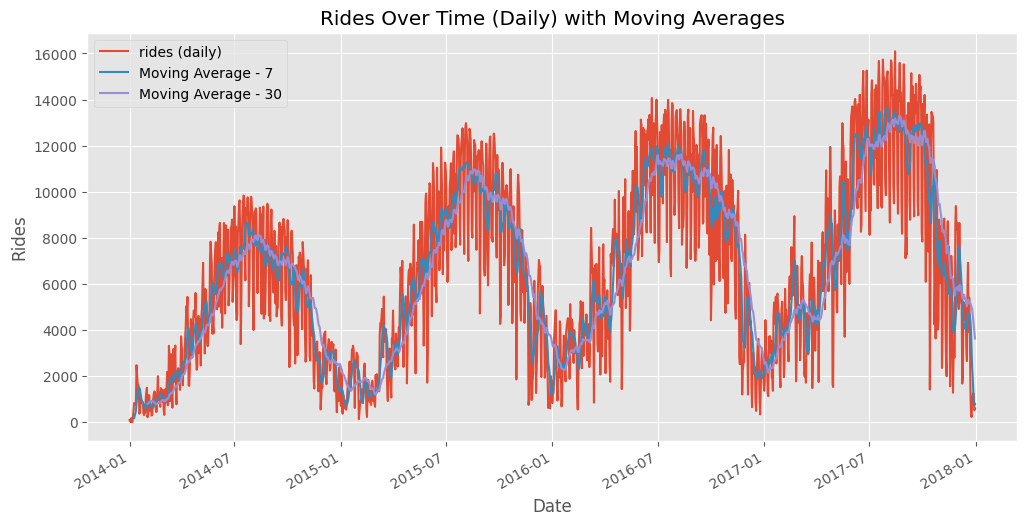

In [22]:
plot_feature_over_time(dataset, RIDES, 'daily', 7, 30)

Adding 7-day and 30-day moving averages helps smooth out daily fluctuations and clearly highlights longer-term trends. Also, it is possible to see the cyclical nature of ride usage over the years and how it tends to increase as the year progresses. 

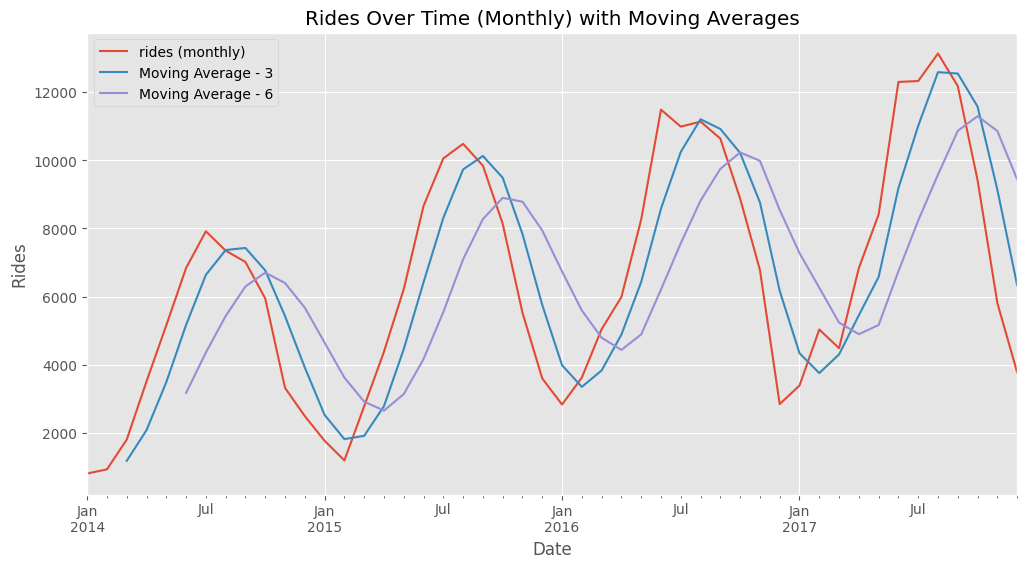

In [23]:
plot_feature_over_time(dataset, RIDES, 'monthly', 3, 6)


This plot aggregates rides into monthly totals with 3-month and 6-month moving averages, providing a clearer picture of mid to long-term trends and seasonal impacts. The moving averages reveal the cyclical nature of the rides, peaking around mid-year during warmer weather and declining towards the colder months.

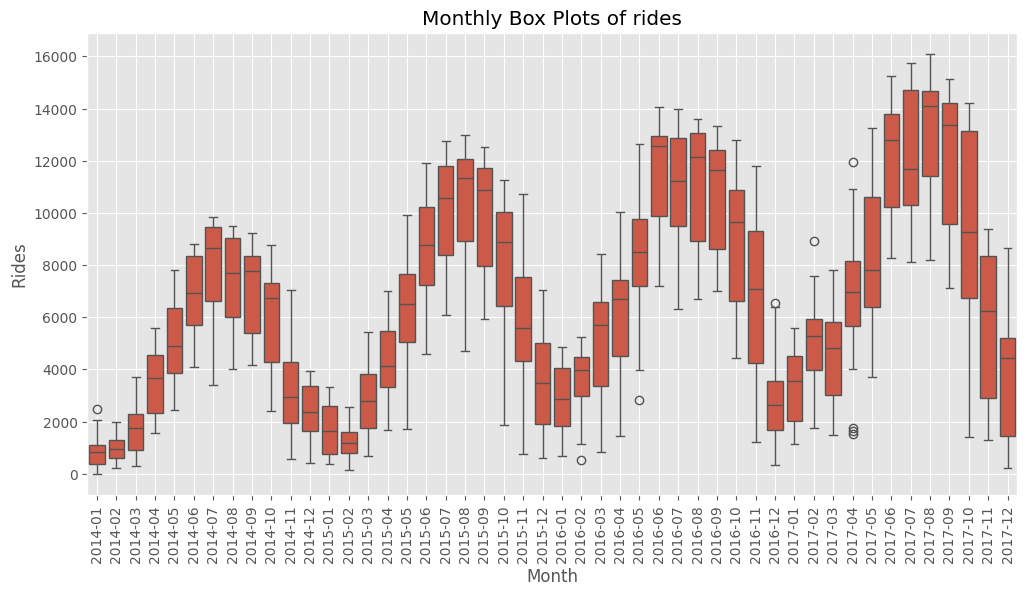

In [24]:
plot_monthly_boxplots(dataset, RIDES)

- **Seasonal Patterns:** The box plots clearly show a seasonal pattern with peaks typically around the middle of the year (May to September) and lower values in the colder months (November to March). This seasonal trend underscores the influence of weather on cycling activity, as warmer months facilitate higher ride volumes.
- **Variability:** The length of the boxes and the whiskers indicate variability in the data. Months with wider boxes or longer whiskers suggest more variability in daily rides within that month. For example, transitional months like April and October show considerable variability, possibly due to fluctuating weather conditions.
- **Outliers:** Points plotted as individual dots represent outliers—days with unusually high or low rides compared to typical values in that month. These could be due to special events, extreme weather, or other anomalies significantly affecting ridership.


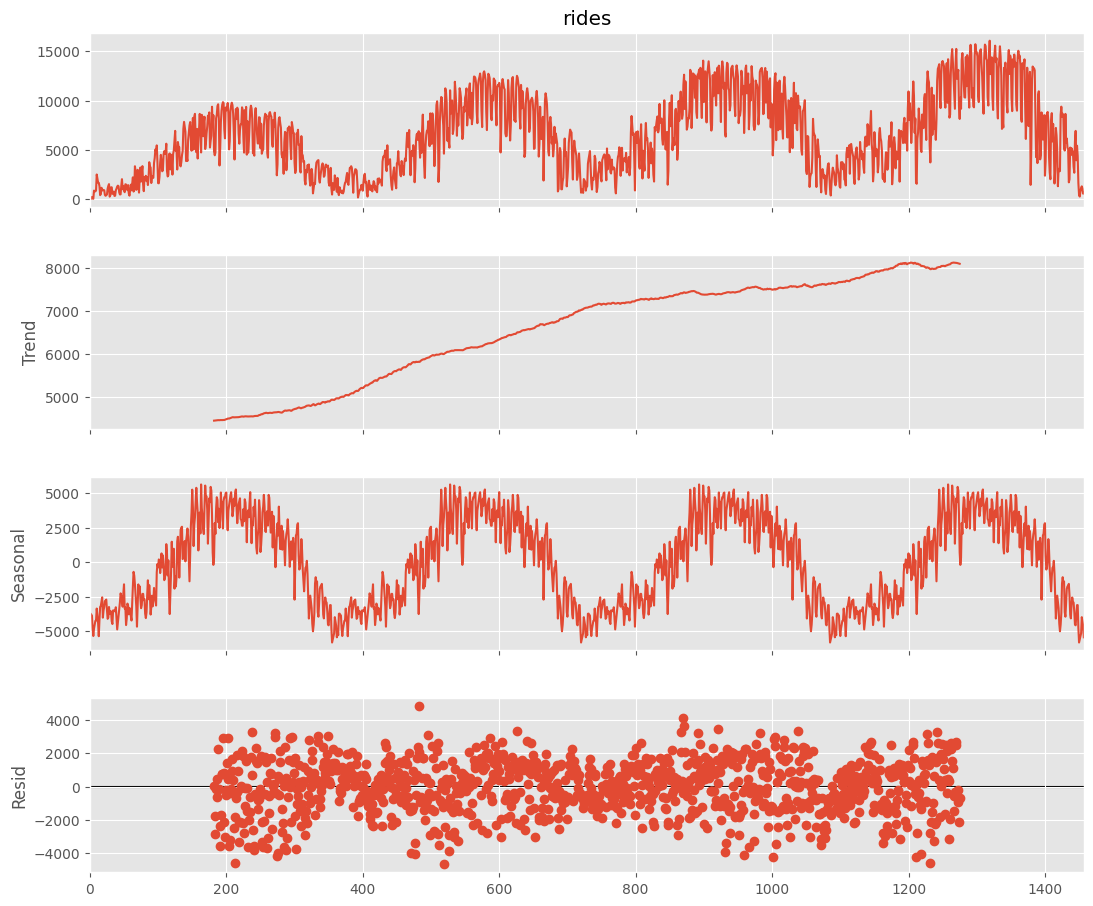

In [25]:
result = seasonal_decompose(dataset[RIDES], model='additive', period=365)
fig = result.plot()
fig.set_figheight(10) 
fig.set_figwidth(12) 
plt.show()

1. **Original Time Series (Top Panel - "rides")**
The topmost graph displays the data on the original daily rides. You can observe noticeable fluctuations in the data that appear to have a repeating pattern, suggesting strong seasonality. The rides peak around the middle of each year and dip during the start and end, likely reflecting seasonal weather impacts on bicycle usage.

2. **Trend Component (Second Panel - "Trend")**
The trend component shows a generally increasing trend over time, which indicates that, aside from seasonal fluctuations, the overall usage of the bike-sharing service is growing.

3. **Seasonal Component (Third Panel - "Seasonal")**
The seasonal pattern is visible and consistent over the period. This component extracts the regular pattern within a year, showing peaks typically in warmer months and troughs in colder months.

4. **Residual Component (Bottom Panel - "Resid")**
The residuals, which represent the irregular or unexplained variance after accounting for trend and seasonality, appear mostly scattered around zero but with some outliers. These are fluctuations that are not explained by the seasonal or trend components.

## Forecasting

When exploring how to use exogenous regressors to explore forecast performance, the following factors could be observed:

- The Holt-Winters model does not support the use of external regressors for forecasting.
- Models based on neural network architectures (RNN, LSTM and GRU) can support external regressors, but present a significant set of combinations that exceeded the initially proposed scope.

For these reasons, a simple prediction of the time series was carried out, discarding exogenous regressors to include the comparison of the Holt-Winters model and limit the construction of the neural network models.

In [26]:
data = dataset.copy()
data = df_drop_columns(data)

train_scaled = splitter_and_scaler(data)[0]
test_scaled = splitter_and_scaler(data)[1]
scaler = splitter_and_scaler(data)[2]

X_train, y_train = create_dataset(train_scaled, TIME_STEP)
X_test, y_test = create_dataset(test_scaled, TIME_STEP)

# Reshape de los datos para [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Simple RNN

In [27]:
simple_rnn = simple_RNN()
simple_rnn_history = simple_rnn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

simple_rnn_train_predict = simple_rnn.predict(X_train)
simple_rnn_test_predict = simple_rnn.predict(X_test)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0592
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115
Epoch 14/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102
Epoch 15/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114
Epoc

In [28]:
simple_rnn_train_predict = inverse_transform_and_mape(train_predict=simple_rnn_train_predict, test_predict=simple_rnn_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[0]
simple_rnn_test_predict = inverse_transform_and_mape(train_predict=simple_rnn_train_predict, test_predict=simple_rnn_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[1]


MAPE: 0.3852
MAPE: 0.3852


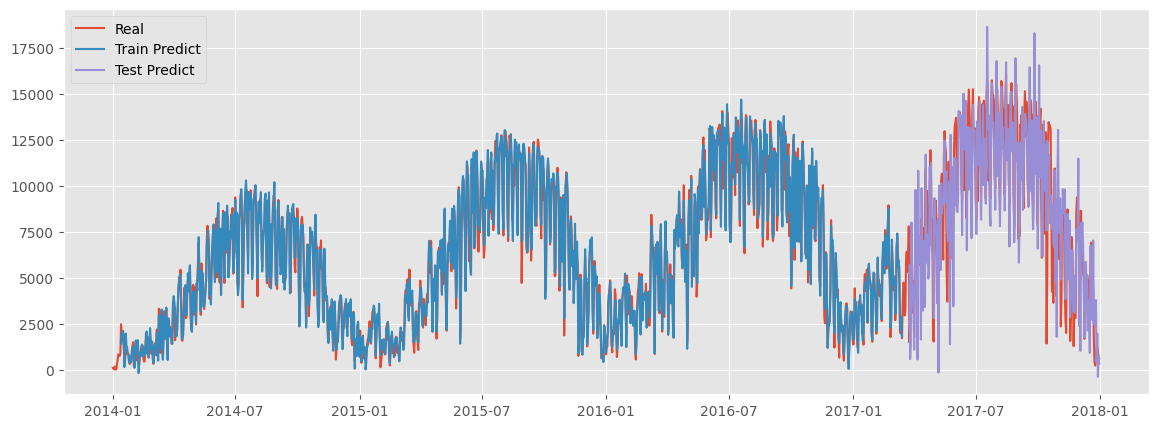

In [29]:
train_test_real_plot(df=data, time_step=TIME_STEP, train_predict=simple_rnn_train_predict, test_predict=simple_rnn_test_predict, scaler=scaler, train_scaled=train_scaled, test_scaled=test_scaled)

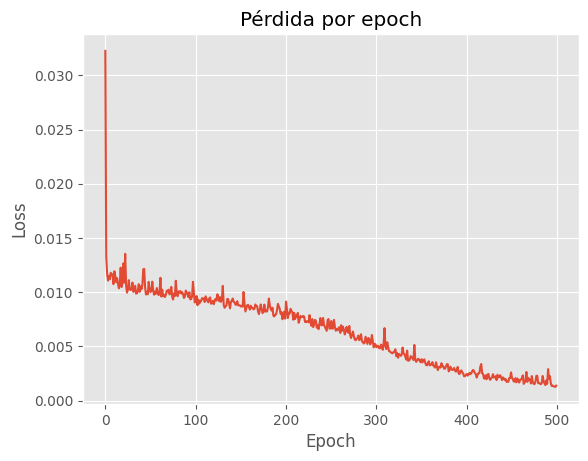

In [30]:
loss_per_epoch_plot(history=simple_rnn_history)

### Simple LSTM

In [31]:
simple_lstm = simple_LSTM()
simple_lstm_history = simple_lstm.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

simple_lstm_train_predict = simple_lstm.predict(X_train)
simple_lstm_test_predict = simple_lstm.predict(X_test)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1164
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0216
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0201
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0174
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0177
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0185
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0184
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0192
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0187
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176
Epoch 14/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179
Epoch 15/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

In [32]:
simple_lstm_train_predict = inverse_transform_and_mape(train_predict=simple_lstm_train_predict, test_predict=simple_lstm_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[0]
simple_lstm_test_predict = inverse_transform_and_mape(train_predict=simple_lstm_train_predict, test_predict=simple_lstm_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[1]

MAPE: 0.3905
MAPE: 0.3905


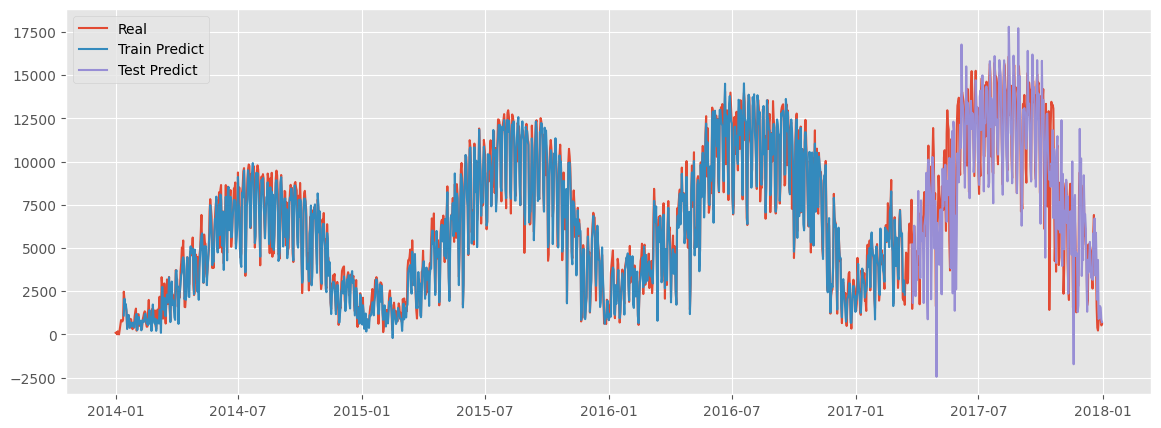

In [33]:
train_test_real_plot(df=data, time_step=TIME_STEP, train_predict=simple_lstm_train_predict, test_predict=simple_lstm_test_predict, scaler=scaler, train_scaled=train_scaled, test_scaled=test_scaled)

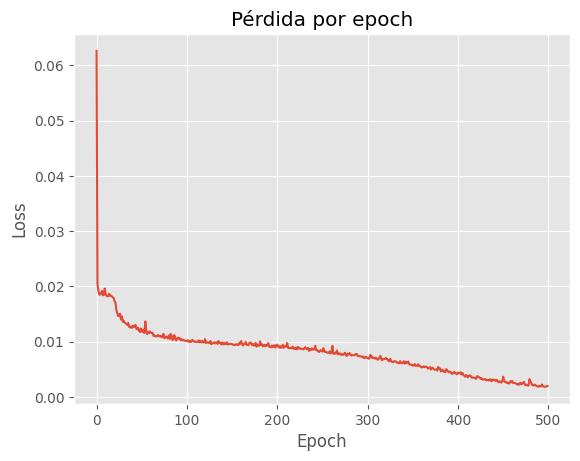

In [34]:
loss_per_epoch_plot(history=simple_lstm_history)

### Simple GRU

In [35]:
simple_gru = simple_GRU()
simple_gru_history = simple_gru.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

simple_gru_train_predict = simple_gru.predict(X_train)
simple_gru_test_predict = simple_gru.predict(X_test)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1501
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0220
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0186
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0195
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0189
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0166
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0156
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0151
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0157
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0139
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0127
Epoch 14/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0128
Epoch 15/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

In [36]:
simple_gru_train_predict = inverse_transform_and_mape(train_predict=simple_gru_train_predict, test_predict=simple_gru_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[0]
simple_gru_test_predict = inverse_transform_and_mape(train_predict=simple_gru_train_predict, test_predict=simple_gru_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[1]

MAPE: 0.3498
MAPE: 0.3498


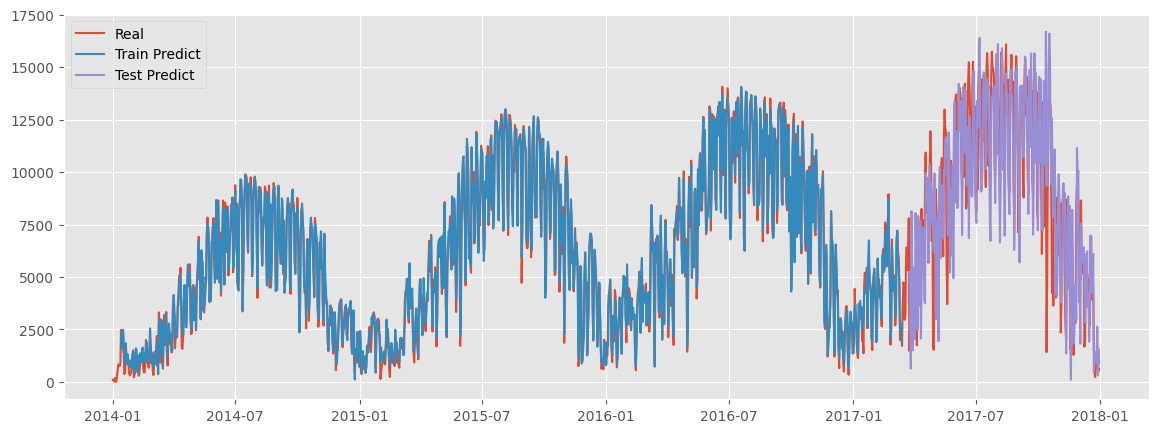

In [37]:
train_test_real_plot(df=data, time_step=TIME_STEP, train_predict=simple_gru_train_predict, test_predict=simple_gru_test_predict, scaler=scaler, train_scaled=train_scaled, test_scaled=test_scaled)

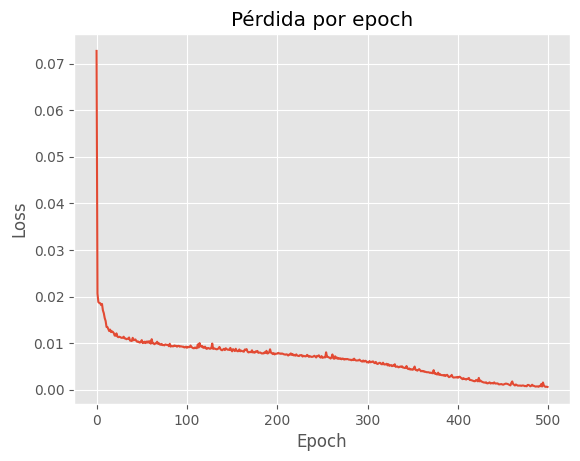

In [38]:
loss_per_epoch_plot(history=simple_gru_history)

### LSTM with Dropout Layers

In [39]:
lstm_with_drop = LSTM_with_drop()
lstm_with_drop_history = lstm_with_drop.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

lstm_with_drop_train_predict = lstm_with_drop.predict(X_train)
lstm_with_drop_test_predict = lstm_with_drop.predict(X_test)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0997
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0283
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0262
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0225
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0250
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0254
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0225
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0217
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0227
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0229
Epoch 14/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0243
Epoch 15/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

In [40]:
lstm_with_drop_train_predict = inverse_transform_and_mape(train_predict=lstm_with_drop_train_predict, test_predict=lstm_with_drop_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[0]
lstm_with_drop_test_predict = inverse_transform_and_mape(train_predict=lstm_with_drop_train_predict, test_predict=lstm_with_drop_test_predict, y_train=y_train, y_test=y_test, scaler=scaler)[1]

MAPE: 0.3497
MAPE: 0.3497


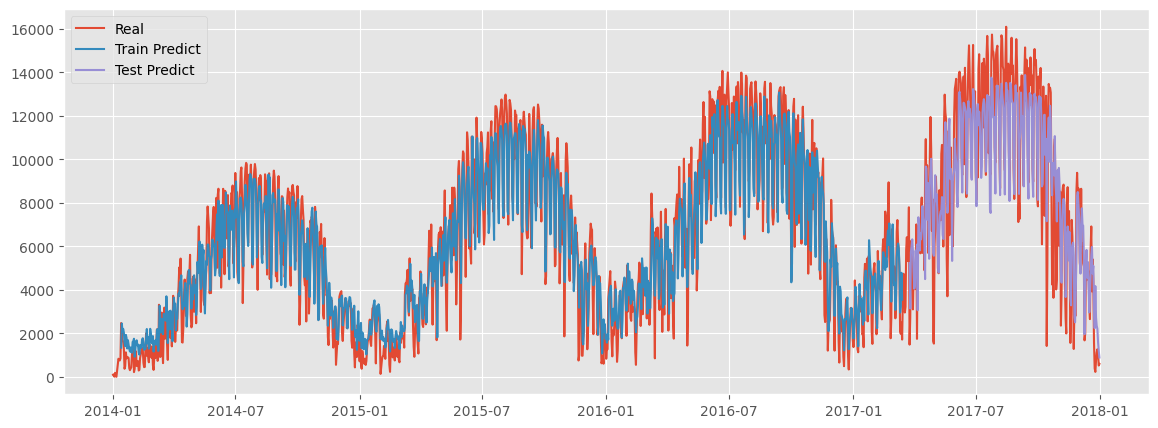

In [41]:
train_test_real_plot(df=data, time_step=TIME_STEP, train_predict=lstm_with_drop_train_predict, test_predict=lstm_with_drop_test_predict, scaler=scaler, train_scaled=train_scaled, test_scaled=test_scaled)

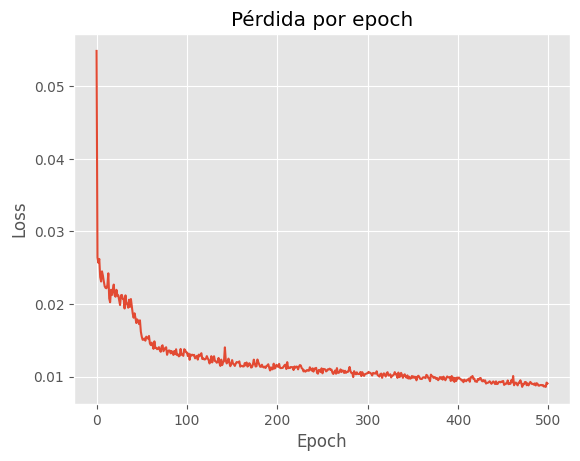

In [42]:
loss_per_epoch_plot(history=lstm_with_drop_history)